In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv("insurance.csv")

In [49]:
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [51]:
df.shape

(1340, 10)

In [52]:
df.duplicated().sum()  #Check Duplicated values

np.int64(0)

In [53]:
df.isna().sum()    #Check Null values

Id               0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [54]:
df.dropna(inplace=True)   #Delete null data

In [55]:
df.isna().sum()

Id               0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [56]:
df.shape

(1332, 10)

In [57]:
df.describe()

,Id,age,bmi,bloodpressure,children,claim
count,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000
mean,674.474474,38.086336,30.658333,94.189189,1.099850,13325.246426
std,384.703785,11.112804,6.118967,11.445173,1.205958,12109.620712
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,341.750000,29.000000,26.200000,86.000000,0.000000,4760.157500
50%,674.500000,38.000000,30.350000,92.000000,1.000000,9412.965000
75%,1007.250000,47.000000,34.725000,99.000000,2.000000,16781.327500
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


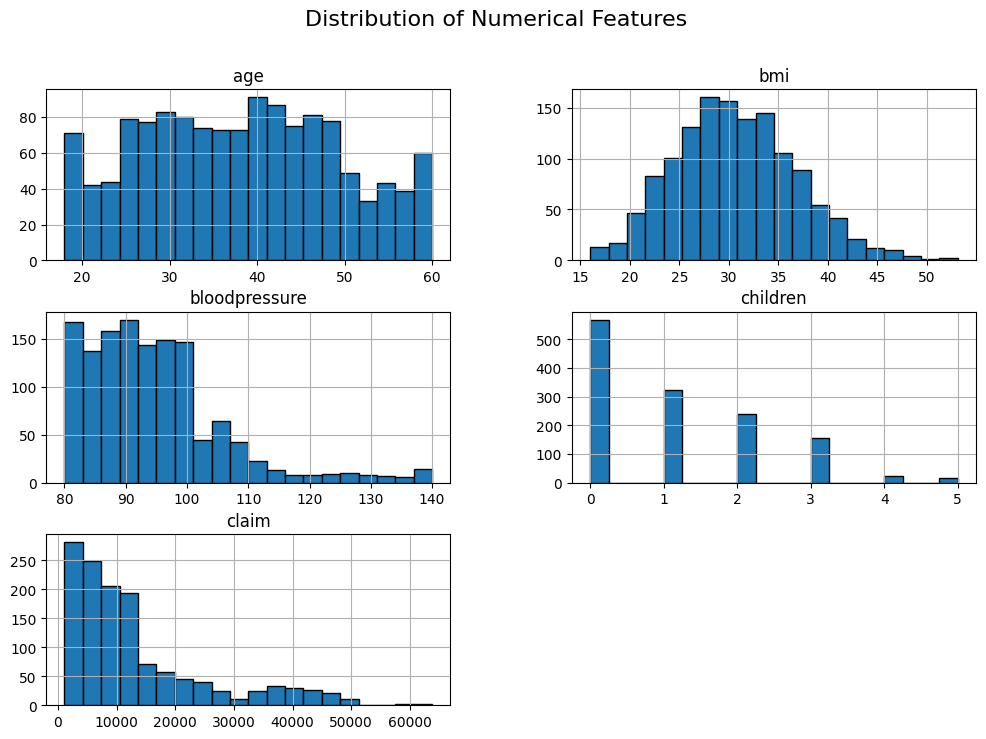

In [58]:
numeric_cols = ["age","bmi",'bloodpressure','children','claim']
df[numeric_cols].hist(bins=20,figsize=(12,8),edgecolor="black")
plt.suptitle("Distribution of Numerical Features",fontsize=16)
plt.show()

In [59]:
df.columns

Index(['Id', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim'],
      dtype='object')

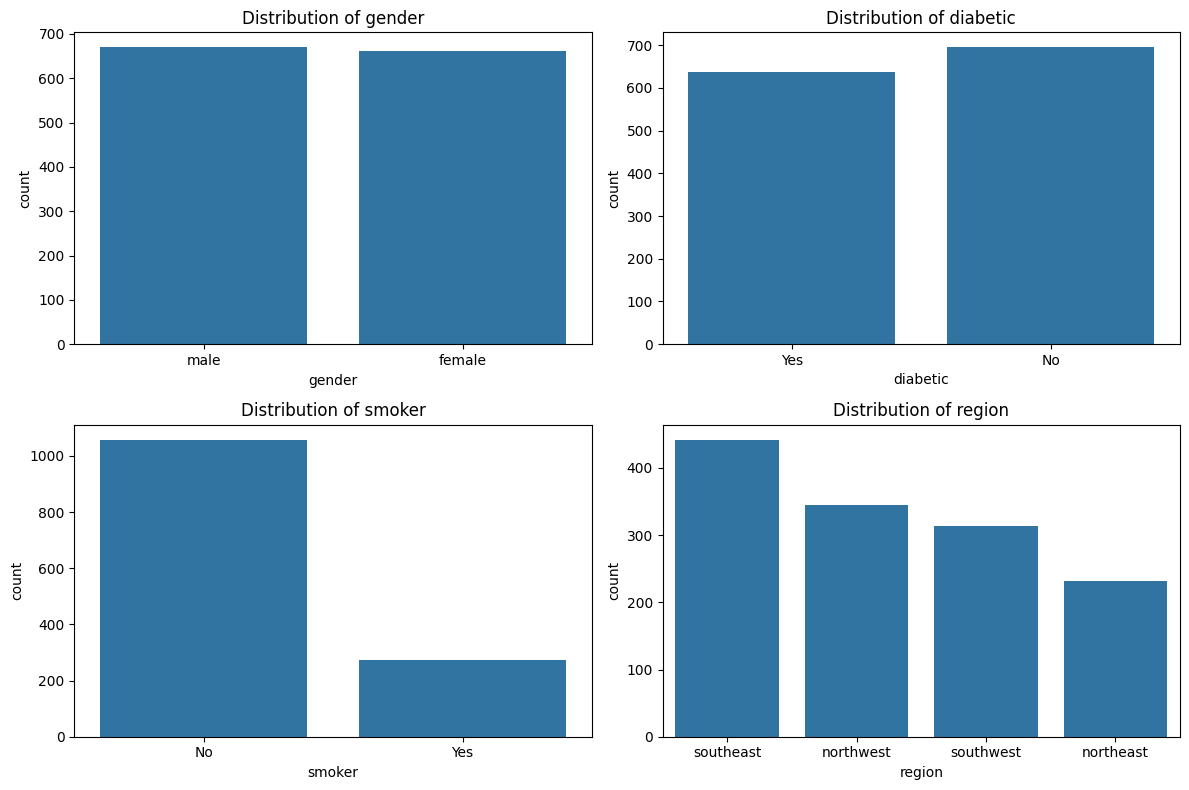

In [60]:
cat_col = ['gender','diabetic','smoker','region']

plt.figure(figsize=(12,8))
for i,col in enumerate(cat_col,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,x=col)
    plt.title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()
    

In [61]:
df.groupby(['gender','smoker'])['claim'].mean().round()

gender  smoker
female  No         8762.0
        Yes       30679.0
male    No         8169.0
        Yes       33042.0
Name: claim, dtype: float64

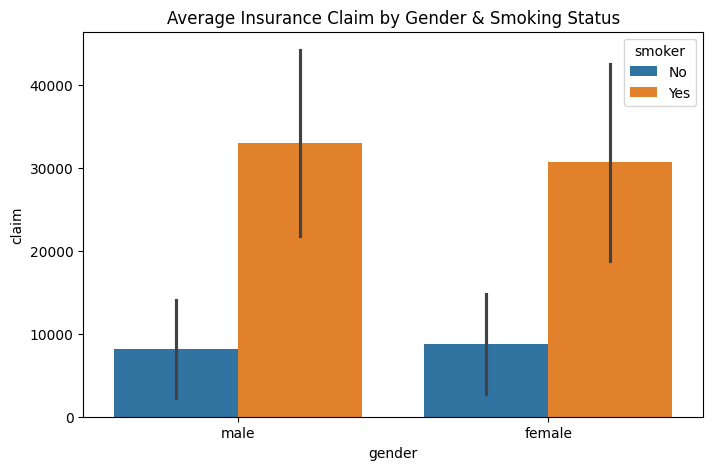

In [62]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='gender',y='claim',hue='smoker',estimator="mean",errorbar="sd")
plt.title("Average Insurance Claim by Gender & Smoking Status")
plt.show()

In [63]:
region_diabetic = df.groupby(['region','diabetic'])['claim'].mean().unstack()

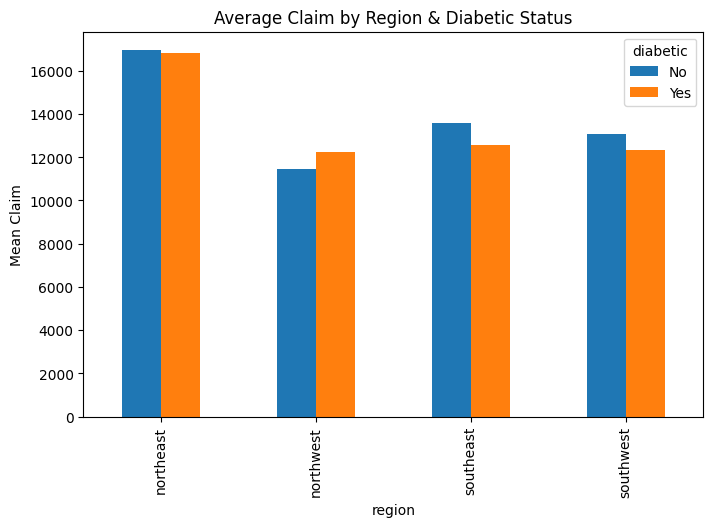

In [64]:
region_diabetic.plot(kind="bar",figsize=(8,5))
plt.title("Average Claim by Region & Diabetic Status")
plt.ylabel("Mean Claim")
plt.show()

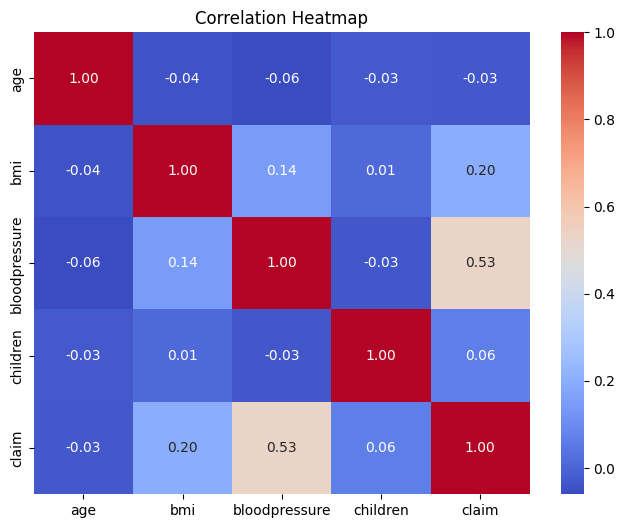

In [65]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

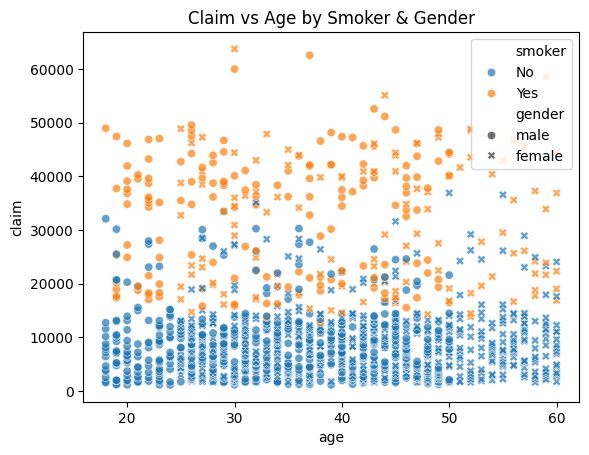

In [66]:
sns.scatterplot(data=df,x="age",y='claim',hue='smoker',style='gender',alpha=0.7)
plt.title("Claim vs Age by Smoker & Gender")
plt.show()

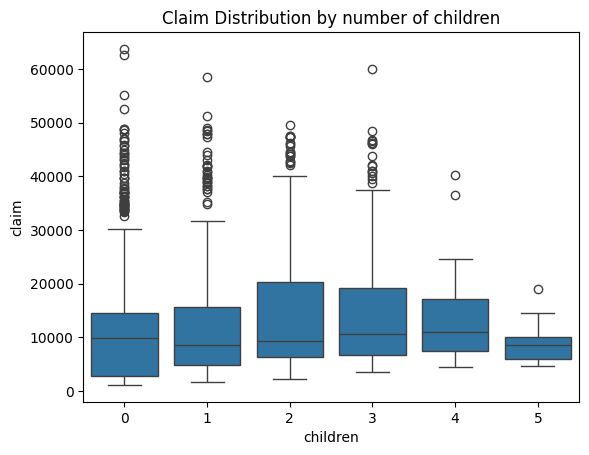

In [67]:
sns.boxplot(data=df,x='children',y='claim')
plt.title("Claim Distribution by number of children")
plt.show()

In [68]:
df['age_group'] = pd.cut(df['age'],bins=[0,18,30,45,60,100],labels=["<18","18-30","31-45","46-60","60+"])

In [69]:
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,31-45
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,18-30
7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80,18-30
8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40,18-30
9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46,18-30


In [70]:
df['age_group'].value_counts()

age_group
31-45    553
46-60    383
18-30    380
<18       16
60+        0
Name: count, dtype: int64

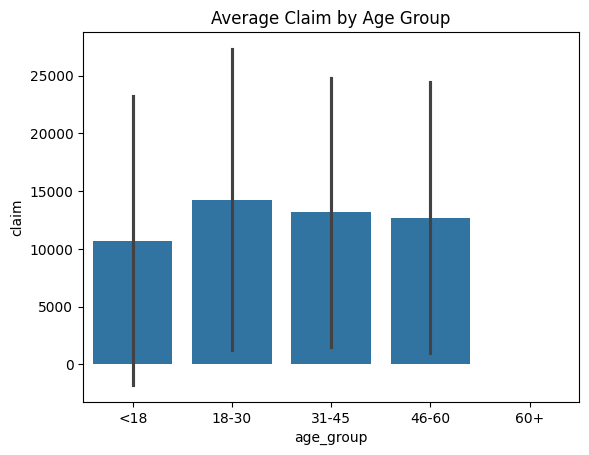

In [71]:
sns.barplot(data=df,x='age_group',y='claim',estimator="mean",errorbar="sd")
plt.title("Average Claim by Age Group")
plt.show()

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [73]:
df.columns

Index(['Id', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim', 'age_group'],
      dtype='object')

In [74]:
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,31-45
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,18-30
7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80,18-30
8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40,18-30
9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46,18-30


In [76]:
X=df[['age','gender','bmi','bloodpressure','diabetic','children','smoker']]
y=df['claim']

Convert The Categorical Columns into numerical for making the model

In [77]:
cat_col = ['gender','diabetic','smoker']
for i in cat_col:
    le = LabelEncoder()
    X[i] =le.fit_transform(X[i])  
X.head()

C:\Users\Vaishali Kanadje\AppData\Local\Temp\ipykernel_21296\3606176174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] =le.fit_transform(X[i])
C:\Users\Vaishali Kanadje\AppData\Local\Temp\ipykernel_21296\3606176174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] =le.fit_transform(X[i])
C:\Users\Vaishali Kanadje\AppData\Local\Temp\ipykernel_21296\3606176174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.0,1,23.2,91,1,0,0
1,24.0,1,30.1,87,0,0,0
7,19.0,1,41.1,100,0,0,0
8,20.0,1,43.0,86,0,0,0
9,30.0,1,53.1,97,0,0,0


In [78]:
#Divide Data 80% for train model and 20% for Testing

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)    

In [79]:
print(x_train.shape,y_train.shape)

(1065, 7) (1065,)


In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
lr = LinearRegression()  #Create Model

In [82]:
lr.fit(x_train,y_train)  # Train Model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [83]:
lr.coef_

array([ 1.43081741e+01,  1.36244164e+00,  3.01163155e+02,  2.33198808e+02,
       -4.48731629e+02,  7.91009176e+02,  2.06723152e+04])

In [84]:
lr.intercept_

np.float64(-23415.475452965205)

##Check the Accuracy of Model

In [85]:
from  sklearn.metrics import r2_score

In [86]:
test_pred = lr.predict(x_test)

In [87]:
r2_score(y_test,test_pred)

0.7186402865210724

#Chech Accuracy After VIF

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
def calculateVIF(input1):
    vif = []
    for i in range(input1.shape[1]):
        vif.append(variance_inflation_factor(input1.values,i))
    result = pd.DataFrame()
    result['Attributes']=input1.columns
    result['VIF']=vif
    return result

In [90]:
result = calculateVIF(X)
result

,Attributes,VIF
0,age,12.183188
1,gender,2.246390
2,bmi,23.814797
3,bloodpressure,34.249996
4,diabetic,1.889479
5,children,1.812323
6,smoker,1.409751


In [91]:
#As per the VIF Result we can drop the bloodpressure column
X.drop('bloodpressure',axis=1,inplace=True)

C:\Users\Vaishali Kanadje\AppData\Local\Temp\ipykernel_21296\3132225335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('bloodpressure',axis=1,inplace=True)


In [92]:
result = calculateVIF(X)
result

,Attributes,VIF
0,age,9.136422
1,gender,2.110990
2,bmi,11.896634
3,diabetic,1.852794
4,children,1.801762
5,smoker,1.263093


In [93]:
test_pred = lr.predict(x_test)

In [94]:
r2_score(y_test,test_pred)

0.7186402865210724